In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
# read in needed csv files
coint_result = pd.read_csv('cointegration_results.csv',index_col=0)
price_data = pd.read_csv('final_price_clean.csv',index_col=0, parse_dates=True)

In [5]:
coint_result.head()

,Stock1,Stock2,P-Value
Sector,,,
Financials,BLK,SYF,0.000006
Real Estate,KIM,PSA,0.000009
Consumer Discretionary,NCLH,SBUX,0.000028
Consumer Discretionary,NCLH,DIS,0.000035
Consumer Discretionary,NCLH,TPR,0.000109


## 1st test run

In [7]:
# make new dataframe from top-most significant p-value (BLK & SYF)
BLK_SYF = price_data[['BLK','SYF']]
BLK_SYF.head()

,BLK,SYF
Date,,
2020-01-02,440.196930,31.153961
2020-01-03,435.517975,30.706579
2020-01-06,435.889862,30.697973
2020-01-07,438.674713,30.267782
2020-01-08,438.570984,30.500080


In [9]:
# normalize using natural log
BLK_norm = np.log(BLK_SYF['BLK'])
SYF_norm = np.log(BLK_SYF['SYF'])

In [10]:
# prepare for Ordinary Least Squares Regression by adding a constant
# since log(a) = log(b) * beta + constant, need to find beta
SYF_norm_c = sm.add_constant(SYF_norm)

In [11]:
#run OLS
model = sm.OLS(BLK_norm,SYF_norm_c).fit()

In [17]:
# find beta
beta = model.params.iloc[1]
beta

np.float64(0.6520918943812206)

In [18]:
spread = model.resid

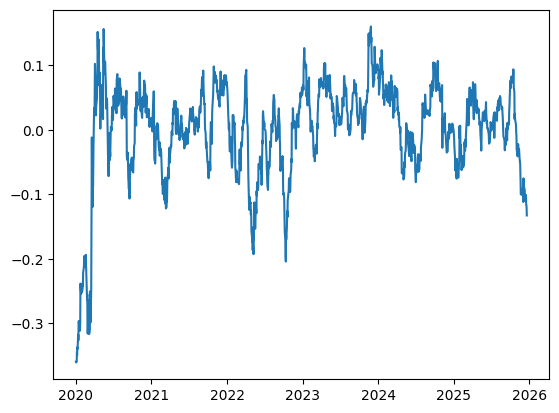

In [21]:
plt.plot(spread)